<a href="https://colab.research.google.com/github/timlok123/PHYS3151-Machine-Learning-in-Physics-2025/blob/main/feedforward-neural-network/feedforward_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward Neural Network (FNN)

In [41]:
! git clone https://github.com/timlok123/PHYS3151-Machine-Learning-in-Physics-2025.git

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2025'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 261 (delta 9), reused 7 (delta 2), pack-reused 239 (from 1)
Receiving objects: 100% (261/261), 47.16 MiB | 20.11 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [43]:
! unzip "/content/PHYS3151-Machine-Learning-in-Physics-2025/feedforward-neural-network/zipped_csv_for_feedforward_neural_network.zip" -d "/content/"

Archive:  /content/PHYS3151-Machine-Learning-in-Physics-2025/feedforward-neural-network/zipped_csv_for_feedforward_neural_network.zip
replace /content/feedforward-neural-network-example-1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/feedforward-neural-network-example-1.csv  
  inflating: /content/feedforward-neural-network-example-2.csv  


## Single Layer Perceptron (No hidden layer)

In [44]:
import pandas as pd
import numpy as np
import scipy.sparse
from pandas import DataFrame

In [45]:
df = pd.read_csv("/content/feedforward-neural-network-example-1.csv", sep=",")
pd.set_option('display.max_columns', None)
print(df)

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  1x11  1x12  \
0          5    0    0    0    0    0    0    0    0    0     0     0     0   
1          0    0    0    0    0    0    0    0    0    0     0     0     0   
2          4    0    0    0    0    0    0    0    0    0     0     0     0   
3          1    0    0    0    0    0    0    0    0    0     0     0     0   
4          9    0    0    0    0    0    0    0    0    0     0     0     0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
59995      8    0    0    0    0    0    0    0    0    0     0     0     0   
59996      3    0    0    0    0    0    0    0    0    0     0     0     0   
59997      5    0    0    0    0    0    0    0    0    0     0     0     0   
59998      6    0    0    0    0    0    0    0    0    0     0     0     0   
59999      8    0    0    0    0    0    0    0    0    0     0     0     0   

       1x13  1x14  1x15  1x16  1x17  1x18  1x19  1x

In [9]:
X = df.drop(columns = 'label')
y = df['label']
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64


A perceptron in this case is simply a feed-forward neural network with no hidden layers. This is equivalent to a multivariate logistic regression, or a Softmax regression.

In [10]:
def computecost(theta,X,y,alpha):
    m = X.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(X,theta) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    cost = (-1 / m) * np.sum(y_mat * np.log(prob)) + (alpha/2)*np.sum(theta*theta) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(X.T,(y_mat - prob)) + alpha*theta #And compute the gradient for that loss
    return cost,grad

In [11]:
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

In [12]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [13]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,theta))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [14]:
theta = np.zeros([X.shape[1],len(np.unique(y))])
print(theta.shape)
iterations = 100
learningRate = 1e-5
losses = []

def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost,grad = computecost(theta,X,y,alpha)
        theta = theta - (learningRate * grad)
        cost_history[it]  = cost

    return theta, cost_history

(784, 10)


In [15]:
theta,cost_history = gradient_descent(X,y,theta,learningRate,iterations)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

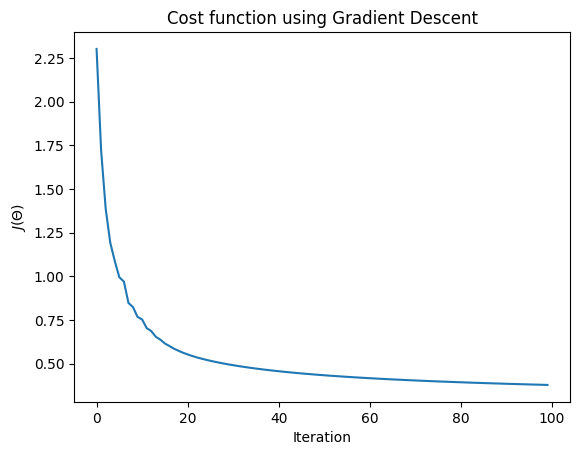

In [16]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
#plt.yscale("log")
plt.title("Cost function using Gradient Descent")

In [17]:
print(theta)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
np.savetxt("theta.csv", theta, delimiter=",")

### Testing the fit

In [46]:
import pandas as pd
import numpy as np
import scipy.sparse
from pandas import DataFrame

#df = pd.read_csv("asset/csv/mnist_test.csv", sep=",")
#df = pd.read_csv("https://quantummc.xyz/wp-content/uploads/2023/03/feedforward-neural-network-example-2.csv", sep=",")

df = pd.read_csv("/content/feedforward-neural-network-example-2.csv", sep=",")
pd.set_option('display.max_columns', None)

print(df)

      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  1x11  1x12  \
0         7    0    0    0    0    0    0    0    0    0     0     0     0   
1         2    0    0    0    0    0    0    0    0    0     0     0     0   
2         1    0    0    0    0    0    0    0    0    0     0     0     0   
3         0    0    0    0    0    0    0    0    0    0     0     0     0   
4         4    0    0    0    0    0    0    0    0    0     0     0     0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
9995      2    0    0    0    0    0    0    0    0    0     0     0     0   
9996      3    0    0    0    0    0    0    0    0    0     0     0     0   
9997      4    0    0    0    0    0    0    0    0    0     0     0     0   
9998      5    0    0    0    0    0    0    0    0    0     0     0     0   
9999      6    0    0    0    0    0    0    0    0    0     0     0     0   

      1x13  1x14  1x15  1x16  1x17  1x18  1x19  1x20  1x21  1x2

In [47]:
X = df.drop(columns = 'label')
y = df['label']

In [48]:
prob,pred=getProbsAndPreds(X)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,pred)

In [49]:
print('The accuracy of this model is:', 100*accuracy,'%')

The accuracy of this model is: 8938.0 %


## Single Hidden Layer (Multiple Layer Perceptron)

Here, we will use the torch package to make our single hidden layer neural network.

In [24]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [25]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())
print(train_dataset)
print(test_dataset)

100%|██████████| 9.91M/9.91M [00:00<00:00, 136MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 37.0MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 99.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.66MB/s]

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


Now we make the dataset iterable.

In [26]:
batch_size = 60000
n_iters = 100
#num_epochs = n_iters / (len(train_dataset) / batch_size)
#num_epochs = int(num_epochs)
num_epochs=100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Then we define what kind of neural network we want to set up. Here it is a feedforward neural network.

In [27]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Output layer, 10 units - one for each digit
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

Our images are 28x28 pixels, so our input dimensions is 784 dimensions. We will have a hidden layer of 200 hidden neurons. And our output will be 10, because there are 0-9 digits

In [28]:
input_dim = 28*28
hidden_dim = 200
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

In [29]:
model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)

FeedforwardNeuralNetModel(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)

We will use cross entropy loss because this is the most appropriate loss function for logistic/softmax regression.

In [30]:
criterion = nn.CrossEntropyLoss()

We will use the SGD optimizer defined within the torch package.

In [31]:
learning_rate = 0.2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [32]:
iter = 0
accuracy_history = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 1 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                images = images.view(-1, 28 * 28).requires_grad_().to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Making use of the GPU
                '''
                if torch.cuda.is_available():
                    correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()
                else:
                    correct += (predicted == labels).sum()
                '''
                correct += (predicted == labels).sum()

            accuracy = 100. * correct.item() / total
            accuracy_history.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 1. Loss: 2.332737445831299. Accuracy: 9.65
Iteration: 2. Loss: 2.301737070083618. Accuracy: 11.26
Iteration: 3. Loss: 2.2949612140655518. Accuracy: 11.49
Iteration: 4. Loss: 2.2895302772521973. Accuracy: 12.34
Iteration: 5. Loss: 2.2841029167175293. Accuracy: 14.22
Iteration: 6. Loss: 2.278665542602539. Accuracy: 16.32
Iteration: 7. Loss: 2.273209571838379. Accuracy: 18.7
Iteration: 8. Loss: 2.2677247524261475. Accuracy: 20.98
Iteration: 9. Loss: 2.2622017860412598. Accuracy: 23.77
Iteration: 10. Loss: 2.256631851196289. Accuracy: 26.61
Iteration: 11. Loss: 2.251004457473755. Accuracy: 29.92
Iteration: 12. Loss: 2.245311737060547. Accuracy: 32.84
Iteration: 13. Loss: 2.239544153213501. Accuracy: 35.69
Iteration: 14. Loss: 2.2336931228637695. Accuracy: 38.24
Iteration: 15. Loss: 2.227750062942505. Accuracy: 40.64
Iteration: 16. Loss: 2.221705913543701. Accuracy: 42.85
Iteration: 17. Loss: 2.215552806854248. Accuracy: 44.79
Iteration: 18. Loss: 2.2092831134796143. Accuracy: 46

Below is a  plot of Accuracy vs Iteration.

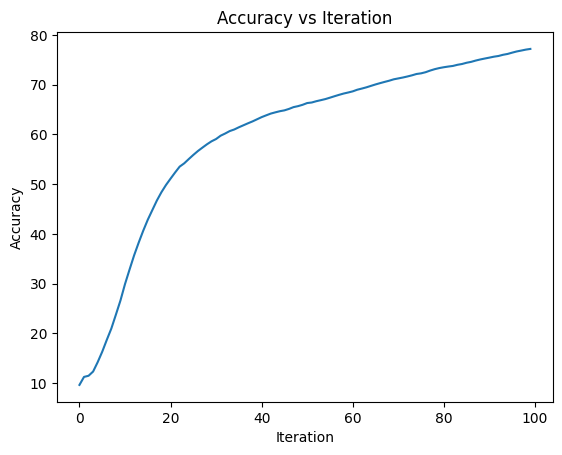

In [33]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
s = interpolate.InterpolatedUnivariateSpline(range(len(accuracy_history)), accuracy_history)
xnew = np.arange(0, 100, 1)
ynew=s(xnew)
#plt.figure()
plt.plot(xnew, ynew)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Iteration')
plt.show()
#plt.plot(accuracy_history)
#plt.xlabel("Iteration")
#plt.ylabel("Accuracy")
#plt.title("Accuracy vs Iteration")

As you can see, the accuracy is not really high. We will use a different method by splitting the dataset into batches, and iterating through the dataset.

In [34]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


batch_size = 600
n_iters = 1000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


input_dim = 28*28
hidden_dim = 200
output_dim = 10

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out



model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
accuracy_history = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                images = images.view(-1, 28 * 28).requires_grad_().to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                '''
                if torch.cuda.is_available():
                    correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()
                else:
                    correct += (predicted == labels).sum()
                '''
                correct += (predicted == labels).sum()

            accuracy = 100. * correct.item() / total
            accuracy_history.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


10
Iteration: 100. Loss: 1.8659454584121704. Accuracy: 59.86
Iteration: 200. Loss: 1.2457656860351562. Accuracy: 75.35
Iteration: 300. Loss: 0.905616044998169. Accuracy: 82.01
Iteration: 400. Loss: 0.6681714653968811. Accuracy: 84.92
Iteration: 500. Loss: 0.572211503982544. Accuracy: 86.69
Iteration: 600. Loss: 0.5461670756340027. Accuracy: 87.73
Iteration: 700. Loss: 0.5462166666984558. Accuracy: 88.39
Iteration: 800. Loss: 0.44051215052604675. Accuracy: 88.94
Iteration: 900. Loss: 0.4309803247451782. Accuracy: 89.22
Iteration: 1000. Loss: 0.3281829059123993. Accuracy: 89.38


In [50]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


batch_size = 600
n_iters = 1000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

trainloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

testloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


input_dim = 28*28
hidden_dim = 200
output_dim = 10

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        input_dim = 28*28
        # Linear function
        self.fc1 = nn.Linear(input_dim, 512)
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        #x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(self.sigmoid(self.fc1(x)))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x



model = FeedforwardNeuralNetModel()

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.05

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)




epochs = 50
train_losses = []
test_losses = []
min_loss = np.inf

for i in range(epochs):
    train_loss = 0
    train_acc = 0
    test_loss = 0
    test_acc = 0

    # Training step
    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model.forward(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(top_class.shape)
        acc = torch.mean(equals.type(torch.FloatTensor))
        train_acc += acc.item()

    # Validation Step
    with torch.no_grad():
        model.eval()

        for images, labels in testloader:
            log_ps = model.forward(images)
            test_loss += criterion(log_ps, labels).item()
            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(top_class.shape)
            test_acc += torch.mean(equals.type(torch.FloatTensor)).item()

    train_losses.append(train_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print("Epoch:",i+1,
          "Train loss:",train_loss/len(trainloader),
          "TrainAcc:",100*train_acc/len(trainloader),
          "Test loss:",test_loss/len(testloader),
          "Test Acc:",100*test_acc/len(testloader))

Epoch: 1 Train loss: 2.21364200592041 TrainAcc: 24.316666640341282 Test loss: 2.091527826645795 Test Acc: 45.91666670406566
Epoch: 2 Train loss: 1.965392519235611 TrainAcc: 47.746666461229324 Test loss: 1.7689323565539192 Test Acc: 62.6862743321587
Epoch: 3 Train loss: 1.620783041715622 TrainAcc: 61.25666630268097 Test loss: 1.399014900712406 Test Acc: 73.49999967743369
Epoch: 4 Train loss: 1.2959605324268342 TrainAcc: 69.03499984741211 Test loss: 1.1067118223975687 Test Acc: 77.74509822621064
Epoch: 5 Train loss: 1.0603712475299836 TrainAcc: 74.05666679143906 Test loss: 0.9115143909173853 Test Acc: 81.85294095207664
Epoch: 6 Train loss: 0.9044658917188645 TrainAcc: 77.08833312988281 Test loss: 0.7832940080586601 Test Acc: 82.96568639138165
Epoch: 7 Train loss: 0.7993287658691406 TrainAcc: 79.21000051498413 Test loss: 0.6947498304002425 Test Acc: 83.98529466460732
Epoch: 8 Train loss: 0.7265566766262055 TrainAcc: 80.66666686534882 Test loss: 0.6300641841748181 Test Acc: 85.029411315917

In [51]:
model.fc1.weight.data

tensor([[ 0.0281,  0.0218,  0.0170,  ...,  0.0254,  0.0213,  0.0193],
        [-0.0157, -0.0134, -0.0080,  ..., -0.0133, -0.0155,  0.0250],
        [-0.0029, -0.0048, -0.0038,  ..., -0.0223, -0.0211,  0.0111],
        ...,
        [ 0.0195,  0.0329, -0.0200,  ...,  0.0111, -0.0157, -0.0068],
        [-0.0084,  0.0125,  0.0227,  ...,  0.0321,  0.0172,  0.0202],
        [ 0.0200, -0.0346,  0.0245,  ..., -0.0331,  0.0292,  0.0257]])

In [52]:
model.fc2.weight.data

tensor([[ 0.2107, -0.0517,  0.0824,  ...,  0.2999,  0.0155, -0.2330],
        [-0.1200,  0.2368, -0.0495,  ..., -0.0178,  0.1261,  0.3184],
        [-0.1626, -0.0019, -0.0824,  ..., -0.2140,  0.2530,  0.2543],
        ...,
        [-0.0700, -0.0274, -0.0592,  ..., -0.1426,  0.1554,  0.2067],
        [ 0.1229, -0.0706, -0.1084,  ...,  0.0105,  0.1801, -0.0770],
        [-0.0844, -0.0876,  0.0249,  ...,  0.0172, -0.1535, -0.1480]])

In [54]:
print("The state dict keys: \n\n", model.state_dict().keys())
checkpoint = {'model': FeedforwardNeuralNetModel(), 'state_dict': model.state_dict(), 'optimizer' : optimizer.state_dict()}
torch.save(checkpoint,'FNN1.pth')

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


print("The state dict keys: \n\n", model.state_dict().keys())

checkpoint = {'model': FeedforwardNeuralNetModel(),
              'state_dict': model.state_dict(),
              'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, './asset/model/FNN1.pth')

## 3 Hidden Layers

Now we turn our attention to the case of a FNN with 3 hidden layers. The gross format of the code is quite similar to the one with 1 hidden layer, except in the model class, the 2 extra layers are stated. Note, the same batch processing method is used.

In [55]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

batch_size = 600
n_iters = 10000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.Sigmoid()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.Sigmoid()

        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.Sigmoid()

        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)



    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

input_dim = 28*28
hidden_dim = 100
output_dim = 10


model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1


optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
accuracy_history = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()


        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                images = images.view(-1, 28 * 28).requires_grad_().to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100. * correct.item() / total
            accuracy_history.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 100. Loss: 2.30431866645813. Accuracy: 11.35
Iteration: 200. Loss: 2.3029773235321045. Accuracy: 11.35
Iteration: 300. Loss: 2.302543878555298. Accuracy: 10.1
Iteration: 400. Loss: 2.304574489593506. Accuracy: 11.35
Iteration: 500. Loss: 2.3033761978149414. Accuracy: 11.35
Iteration: 600. Loss: 2.2959470748901367. Accuracy: 11.35
Iteration: 700. Loss: 2.3018412590026855. Accuracy: 11.35
Iteration: 800. Loss: 2.299860954284668. Accuracy: 11.35
Iteration: 900. Loss: 2.304309129714966. Accuracy: 9.8
Iteration: 1000. Loss: 2.3084959983825684. Accuracy: 11.35
Iteration: 1100. Loss: 2.297957181930542. Accuracy: 10.1
Iteration: 1200. Loss: 2.299076795578003. Accuracy: 11.35
Iteration: 1300. Loss: 2.306274652481079. Accuracy: 9.8
Iteration: 1400. Loss: 2.301060914993286. Accuracy: 14.89
Iteration: 1500. Loss: 2.292780876159668. Accuracy: 11.35
Iteration: 1600. Loss: 2.2943780422210693. Accuracy: 11.35
Iteration: 1700. Loss: 2.2986886501312256. Accuracy: 11.35
Iteration: 1800. Loss: 

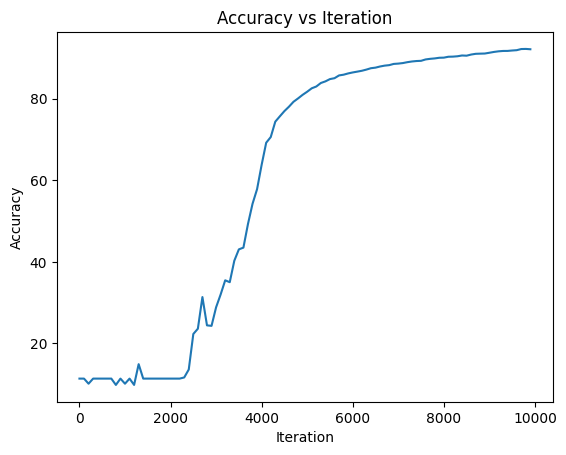

In [56]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
s = interpolate.InterpolatedUnivariateSpline(range(len(accuracy_history)), accuracy_history)
xnew = np.arange(0, 100, 1)
ynew=s(xnew)

plt.plot(100*xnew, ynew)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Iteration')
plt.show()